In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_trans= pd.read_csv("trans/transcript_data/1.csv")

In [4]:
df_trans.head(2)

id  seek  start   end                                               text  \
0   0     0   0.00  5.56   Hello, I am Jeffrey Shepherd and I am current...   
1   1     0   5.56  9.60   IIM Coikode. I have completed my B.Tech in Bi...   

                                              tokens  temperature  \
0  [50364, 2425, 11, 286, 669, 1587, 84, 2938, 49...          0.0   
1  [50642, 286, 6324, 3066, 1035, 1429, 13, 286, ...          0.0   

   avg_logprob  compression_ratio  no_speech_prob  positive  negative  \
0    -0.447179           1.651235         0.63588  0.580265  0.152281   
1    -0.447179           1.651235         0.63588  0.550327  0.189263   

    neutral  confident  hesitant   concise  enthusiastic  speech_speed  
0  0.267454   0.846701  0.845698  0.635805      0.647783      2.517986  
1  0.260410   0.679283  0.733701  0.544145      0.417390      3.217822

In [5]:
df_trans.columns

Index(['id', 'seek', 'start', 'end', 'text', 'tokens', 'temperature',
       'avg_logprob', 'compression_ratio', 'no_speech_prob', 'positive',
       'negative', 'neutral', 'confident', 'hesitant', 'concise',
       'enthusiastic', 'speech_speed'],
      dtype='object')

In [6]:
df_emotion = pd.read_csv("emotion_data-20240913T095942Z-001/emotion_data/1/emotion.csv")
df_emotion.head()

movie_id  image_seq     angry   disgust  \
0  93663f94-bf0a-4ce8-a29a-a5236cc7fe6a          0   4.31735  0.000594   
1  93663f94-bf0a-4ce8-a29a-a5236cc7fe6a          1  53.22530  2.981640   
2  93663f94-bf0a-4ce8-a29a-a5236cc7fe6a          2   8.79651  0.029468   
3  93663f94-bf0a-4ce8-a29a-a5236cc7fe6a          3   9.45303  0.106778   
4  93663f94-bf0a-4ce8-a29a-a5236cc7fe6a          4  56.00020  0.000004   

        fear     happy        sad   surprise   neutral dominant_emotion  
0   2.879790   1.65035   2.779980   0.600814  87.77110          neutral  
1  12.736800   1.52347   1.051320  27.216800   1.26462            angry  
2   2.968160  16.83150  39.884600   0.279335  31.21050              sad  
3   1.553080  20.93010   3.503870   0.909426  63.54370          neutral  
4   0.162231   5.58358   0.197026  12.807600  25.24940            angry

In [7]:
df_emotion.columns

Index(['movie_id', 'image_seq', 'angry', 'disgust', 'fear', 'happy', 'sad',
       'surprise', 'neutral', 'dominant_emotion'],
      dtype='object')

In [8]:
df_gaze= pd.read_csv("emotion_data-20240913T095942Z-001/emotion_data/1/gaze.csv")

In [9]:
df_gaze.head()

movie_id  image_seq  gaze  blink  eye_offset
0  93663f94-bf0a-4ce8-a29a-a5236cc7fe6a          1     1      0      6.2253
1  93663f94-bf0a-4ce8-a29a-a5236cc7fe6a          2     1      0     22.7274
2  93663f94-bf0a-4ce8-a29a-a5236cc7fe6a          3     1      0      2.5704
3  93663f94-bf0a-4ce8-a29a-a5236cc7fe6a          4     1      0     21.1097
4  93663f94-bf0a-4ce8-a29a-a5236cc7fe6a          5     1      0      1.8453

In [10]:
df_gaze.columns

Index(['movie_id', 'image_seq', 'gaze', 'blink', 'eye_offset'], dtype='object')

In [11]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

def emotion_eda(df):
    # Basic Information
    print("Data Summary:")
    print(df.info())
    print("\nStatistical Summary:")
    print(df.describe())
    
    # Check for Missing Values
    print("\nMissing Values:")
    print(df.isnull().sum())

    # Check for Duplicates
    print("\nDuplicates:")
    print(df.duplicated().sum())
    
    # Distribution of Emotion Scores
    emotion_columns = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
    df[emotion_columns].hist(bins=20, figsize=(14, 10))
    plt.suptitle('Distribution of Emotion Scores')
    plt.show()
    
    # Dominant Emotion Analysis
    dominant_emotion_counts = df['dominant_emotion'].value_counts()
    print("\nDominant Emotion Counts:")
    print(dominant_emotion_counts)
    dominant_emotion_counts.plot(kind='bar', title='Dominant Emotion Counts')
    plt.show()
    
    # Correlation Analysis
    correlation_matrix = df[emotion_columns].corr()
    print("\nCorrelation Matrix:")
    print(correlation_matrix)
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix of Emotion Scores')
    plt.show()
    
    # Temporal or Sequential Analysis
    plt.figure(figsize=(14, 8))
    for emotion in emotion_columns:
        plt.plot(df['image_seq'], df[emotion], label=emotion)
    plt.xlabel('Image Sequence')
    plt.ylabel('Emotion Score')
    plt.title('Emotion Scores Over Image Sequence')
    plt.legend()
    plt.show()
    
    # Group Analysis by Dominant Emotion
    grouped = df.groupby('dominant_emotion').mean()
    print("\nAverage Emotion Scores by Dominant Emotion:")
    print(grouped)
    grouped[emotion_columns].plot(kind='bar', figsize=(14, 8))
    plt.title('Average Emotion Scores by Dominant Emotion')
    plt.show()


Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   movie_id          87 non-null     object 
 1   image_seq         87 non-null     int64  
 2   angry             87 non-null     float64
 3   disgust           87 non-null     float64
 4   fear              87 non-null     float64
 5   happy             87 non-null     float64
 6   sad               87 non-null     float64
 7   surprise          87 non-null     float64
 8   neutral           87 non-null     float64
 9   dominant_emotion  87 non-null     object 
dtypes: float64(7), int64(1), object(2)
memory usage: 6.9+ KB
None

Statistical Summary:
       image_seq      angry       disgust       fear      happy        sad  \
count  87.000000  87.000000  8.700000e+01  87.000000  87.000000  87.000000   
mean   45.390805  14.451059  6.168965e-01  18.382797   5.865318  13.575324

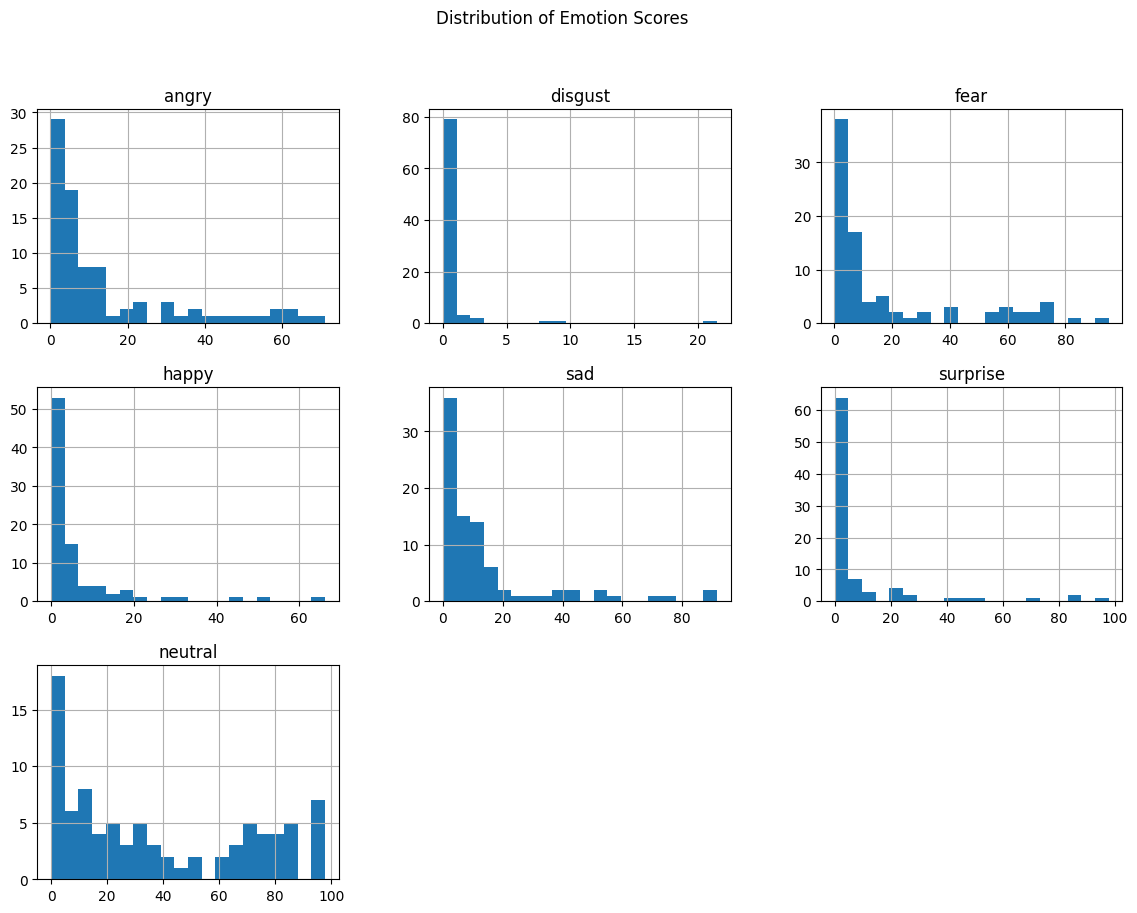


Dominant Emotion Counts:
dominant_emotion
neutral     37
fear        19
angry       11
sad         10
surprise     7
happy        3
Name: count, dtype: int64


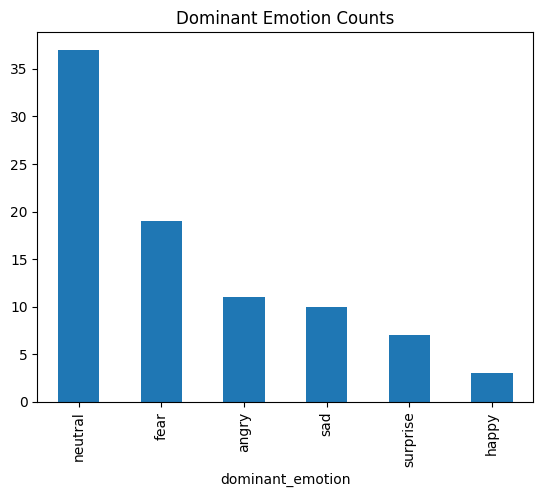


Correlation Matrix:
             angry   disgust      fear     happy       sad  surprise   neutral
angry     1.000000 -0.030151 -0.226684 -0.042435 -0.122666  0.049052 -0.323825
disgust  -0.030151  1.000000  0.135674  0.093685  0.004282 -0.020750 -0.186817
fear     -0.226684  0.135674  1.000000 -0.052387 -0.154630 -0.054493 -0.493469
happy    -0.042435  0.093685 -0.052387  1.000000 -0.058035 -0.049472 -0.217198
sad      -0.122666  0.004282 -0.154630 -0.058035  1.000000 -0.276290 -0.226286
surprise  0.049052 -0.020750 -0.054493 -0.049472 -0.276290  1.000000 -0.390989
neutral  -0.323825 -0.186817 -0.493469 -0.217198 -0.226286 -0.390989  1.000000


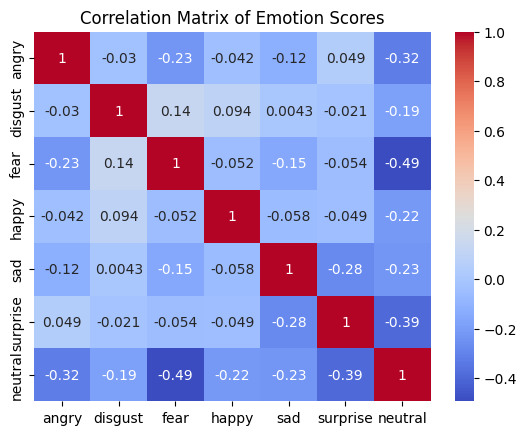

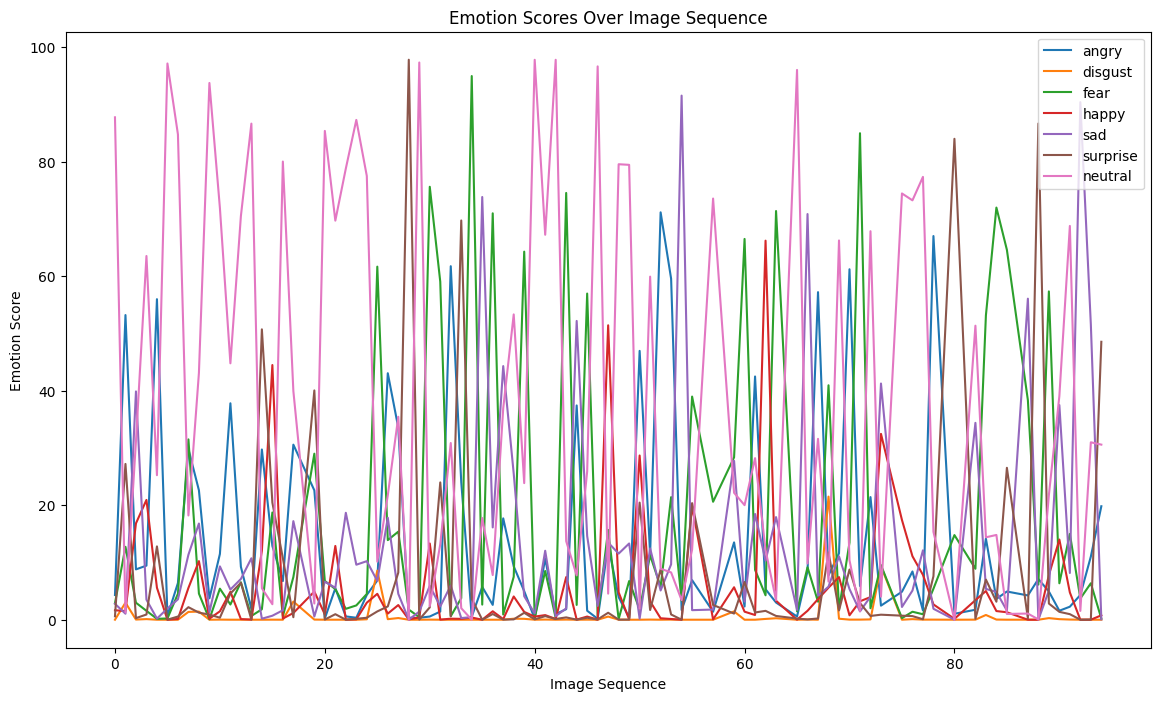

Error reading emotion_data-20240913T095942Z-001/emotion_data/1/emotion.csv: agg function failed [how->mean,dtype->object]
Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   movie_id          87 non-null     object 
 1   image_seq         87 non-null     int64  
 2   angry             87 non-null     float64
 3   disgust           87 non-null     float64
 4   fear              87 non-null     float64
 5   happy             87 non-null     float64
 6   sad               87 non-null     float64
 7   surprise          87 non-null     float64
 8   neutral           87 non-null     float64
 9   dominant_emotion  87 non-null     object 
dtypes: float64(7), int64(1), object(2)
memory usage: 6.9+ KB
None

Statistical Summary:
       image_seq      angry       disgust       fear      happy        sad  \
count  87.000000  87.000000  8

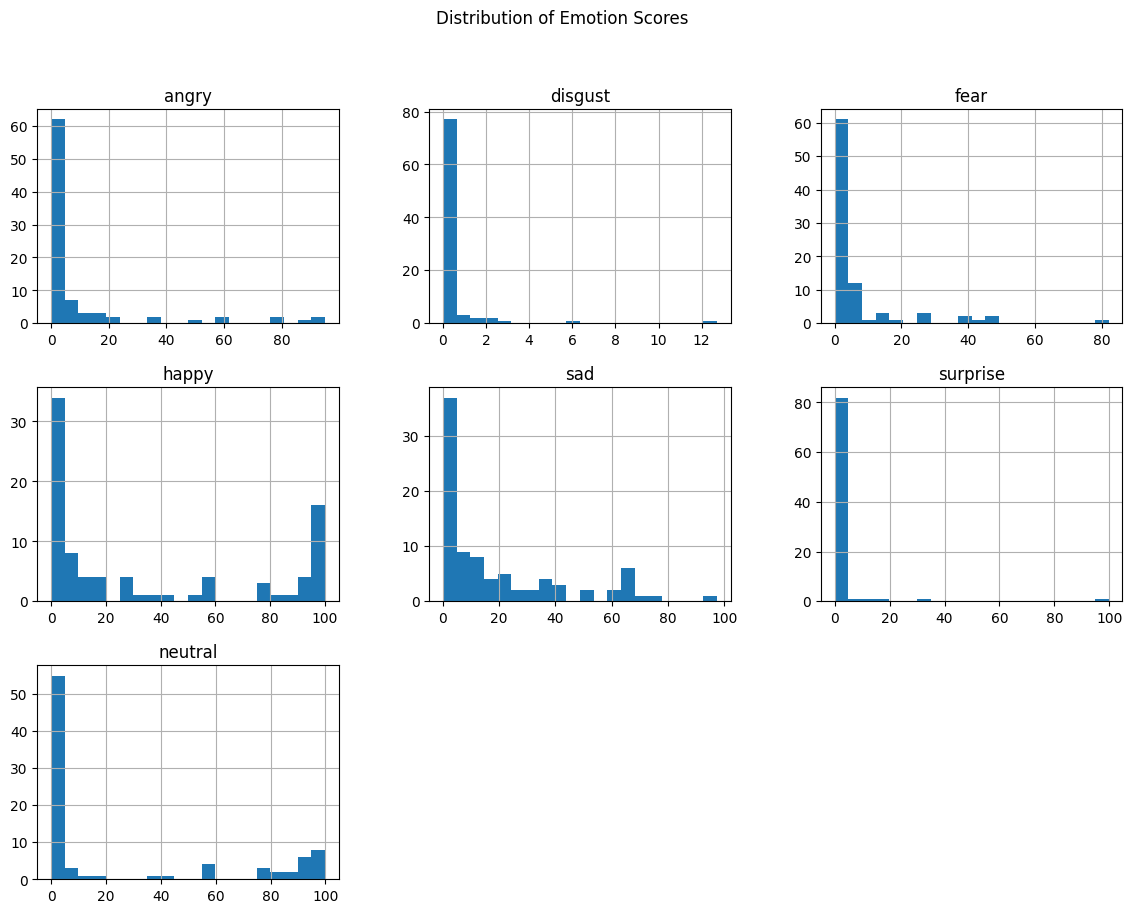


Dominant Emotion Counts:
dominant_emotion
happy       31
neutral     26
sad         15
angry        9
fear         4
surprise     2
Name: count, dtype: int64


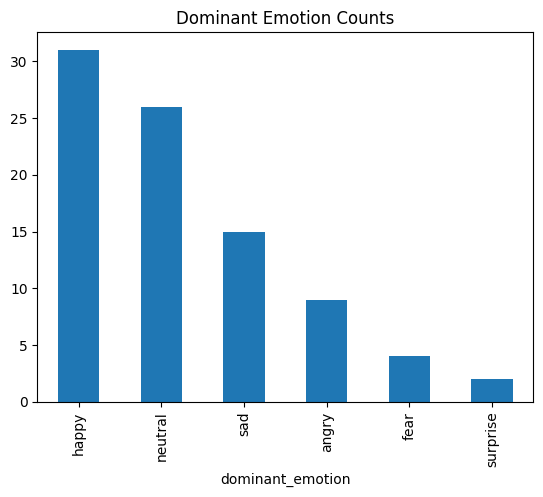


Correlation Matrix:
             angry   disgust      fear     happy       sad  surprise   neutral
angry     1.000000  0.376494 -0.021689 -0.310473  0.001146 -0.013183 -0.261804
disgust   0.376494  1.000000  0.162731 -0.149071 -0.000532  0.027271 -0.168797
fear     -0.021689  0.162731  1.000000 -0.191841  0.108723  0.039167 -0.225216
happy    -0.310473 -0.149071 -0.191841  1.000000 -0.319102 -0.141855 -0.545929
sad       0.001146 -0.000532  0.108723 -0.319102  1.000000 -0.087774 -0.283059
surprise -0.013183  0.027271  0.039167 -0.141855 -0.087774  1.000000 -0.101539
neutral  -0.261804 -0.168797 -0.225216 -0.545929 -0.283059 -0.101539  1.000000


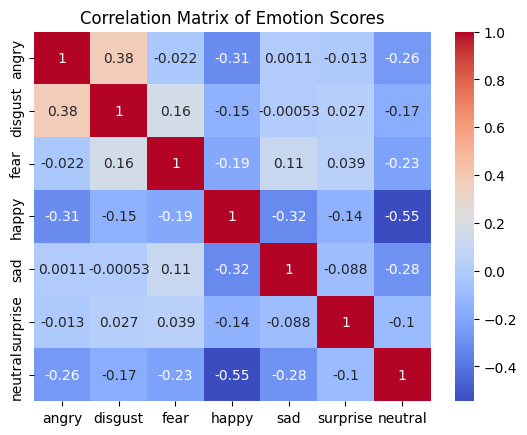

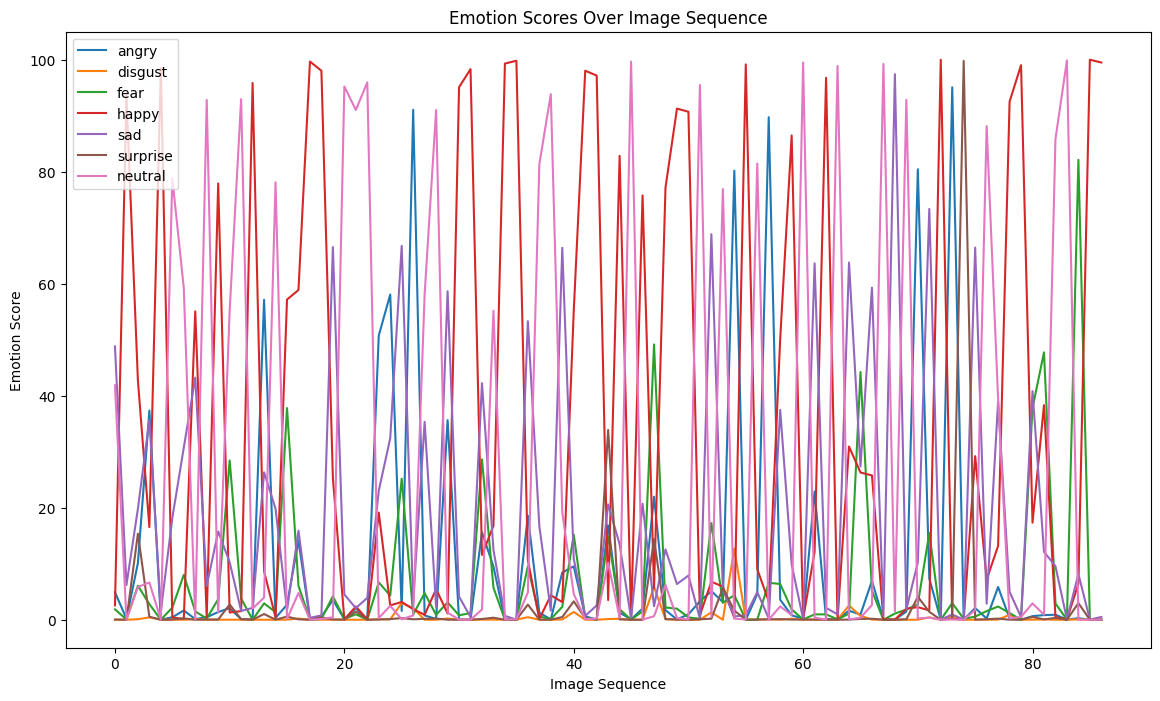

Error reading emotion_data-20240913T095942Z-001/emotion_data/2/emotion.csv: agg function failed [how->mean,dtype->object]
Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   movie_id          100 non-null    object 
 1   image_seq         100 non-null    int64  
 2   angry             100 non-null    float64
 3   disgust           100 non-null    float64
 4   fear              100 non-null    float64
 5   happy             100 non-null    float64
 6   sad               100 non-null    float64
 7   surprise          100 non-null    float64
 8   neutral           100 non-null    float64
 9   dominant_emotion  100 non-null    object 
dtypes: float64(7), int64(1), object(2)
memory usage: 7.9+ KB
None

Statistical Summary:
        image_seq       angry       disgust        fear       happy  \
count  100.000000  100.000000  1.000

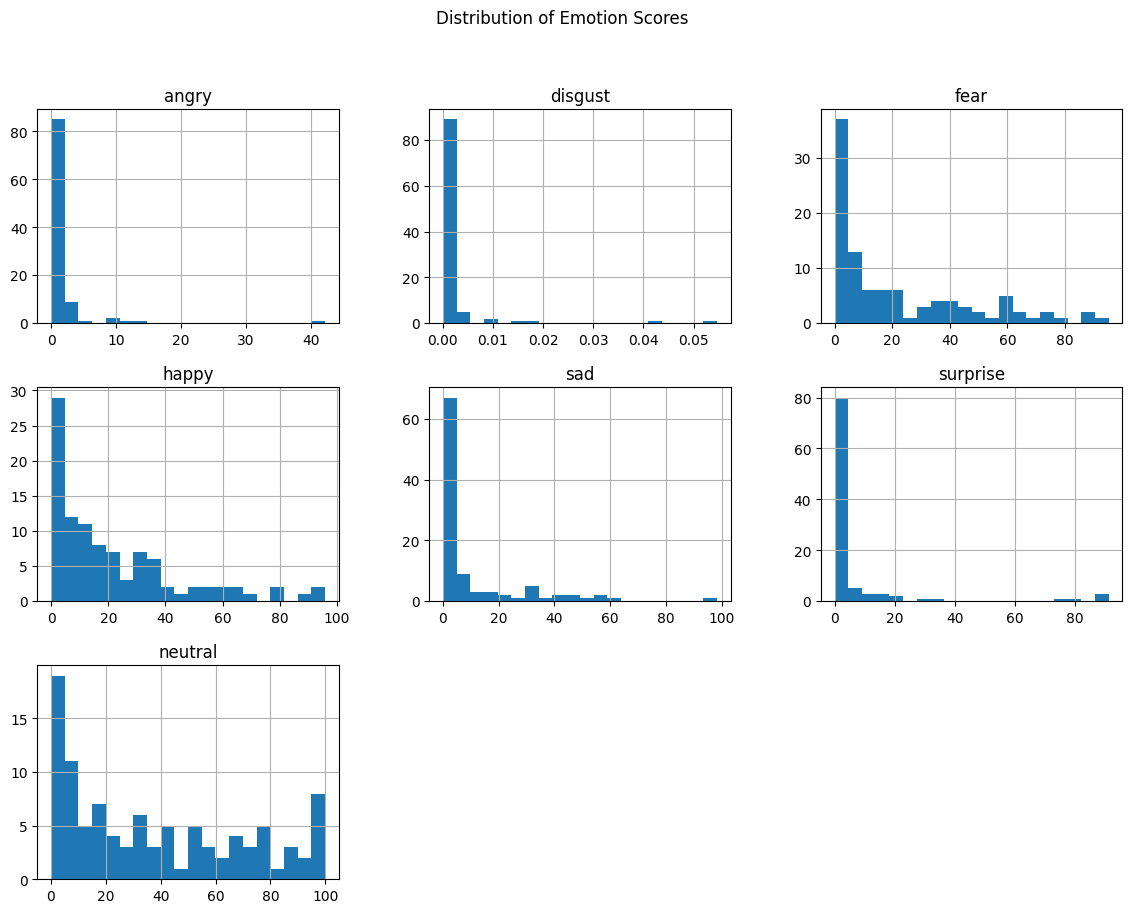


Dominant Emotion Counts:
dominant_emotion
neutral     43
fear        26
happy       16
sad          9
surprise     5
angry        1
Name: count, dtype: int64


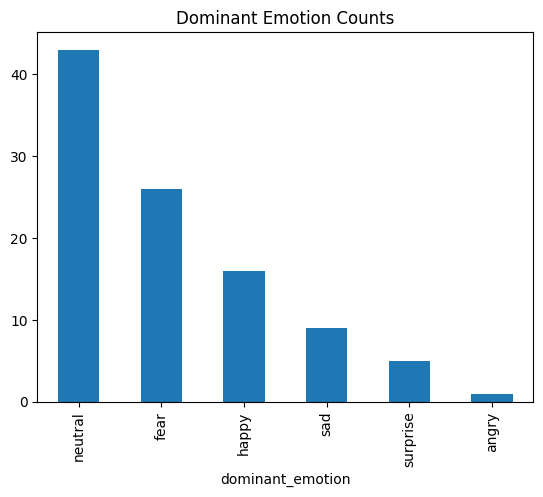


Correlation Matrix:
             angry   disgust      fear     happy       sad  surprise   neutral
angry     1.000000  0.357227  0.054289 -0.032160  0.049114 -0.058751 -0.153371
disgust   0.357227  1.000000  0.185311 -0.037354  0.039690  0.038628 -0.208886
fear      0.054289  0.185311  1.000000 -0.219632  0.075124 -0.073951 -0.607598
happy    -0.032160 -0.037354 -0.219632  1.000000 -0.249603 -0.243451 -0.267191
sad       0.049114  0.039690  0.075124 -0.249603  1.000000 -0.157564 -0.331038
surprise -0.058751  0.038628 -0.073951 -0.243451 -0.157564  1.000000 -0.256653
neutral  -0.153371 -0.208886 -0.607598 -0.267191 -0.331038 -0.256653  1.000000


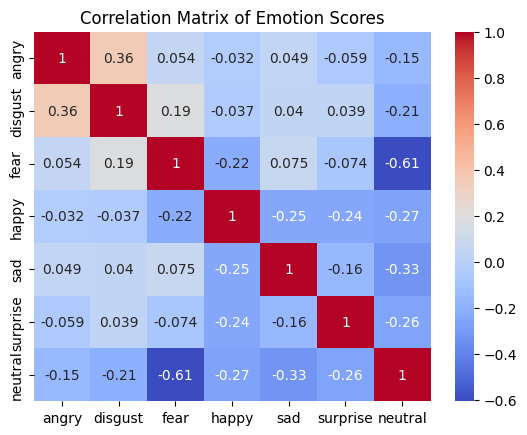

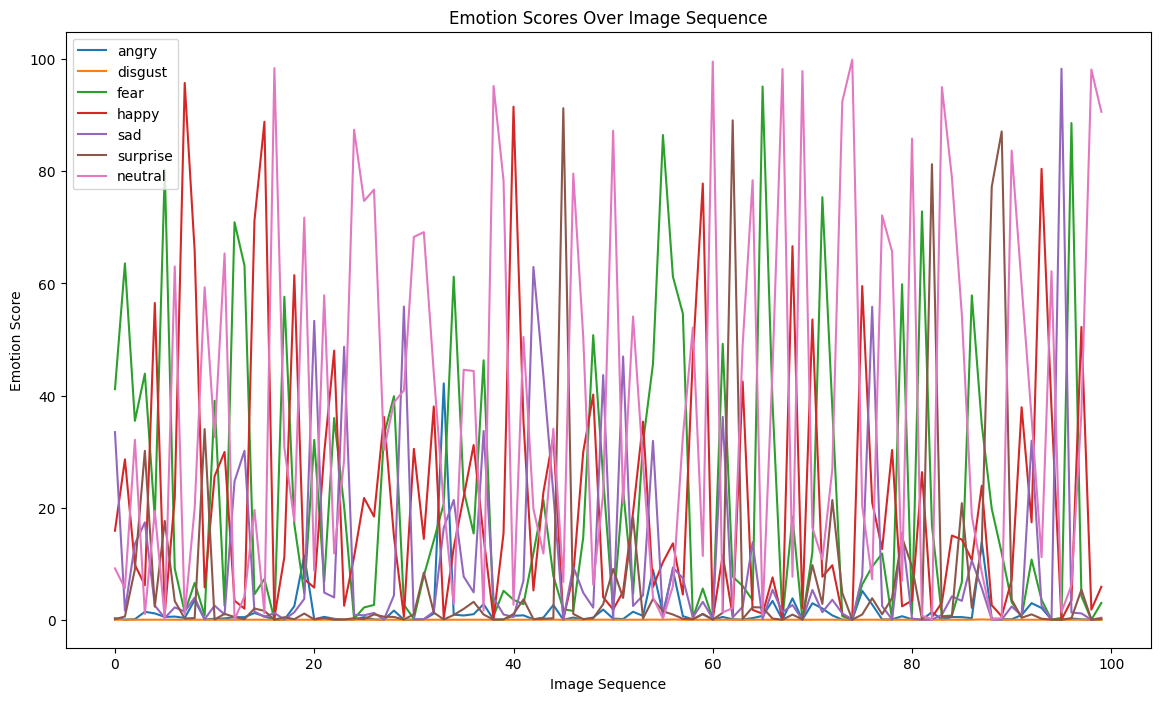

Error reading emotion_data-20240913T095942Z-001/emotion_data/3/emotion.csv: agg function failed [how->mean,dtype->object]
Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   movie_id          99 non-null     object 
 1   image_seq         99 non-null     int64  
 2   angry             99 non-null     float64
 3   disgust           99 non-null     float64
 4   fear              99 non-null     float64
 5   happy             99 non-null     float64
 6   sad               99 non-null     float64
 7   surprise          99 non-null     float64
 8   neutral           99 non-null     float64
 9   dominant_emotion  99 non-null     object 
dtypes: float64(7), int64(1), object(2)
memory usage: 7.9+ KB
None

Statistical Summary:
       image_seq      angry       disgust       fear      happy        sad  \
count  99.000000  99.000000  9

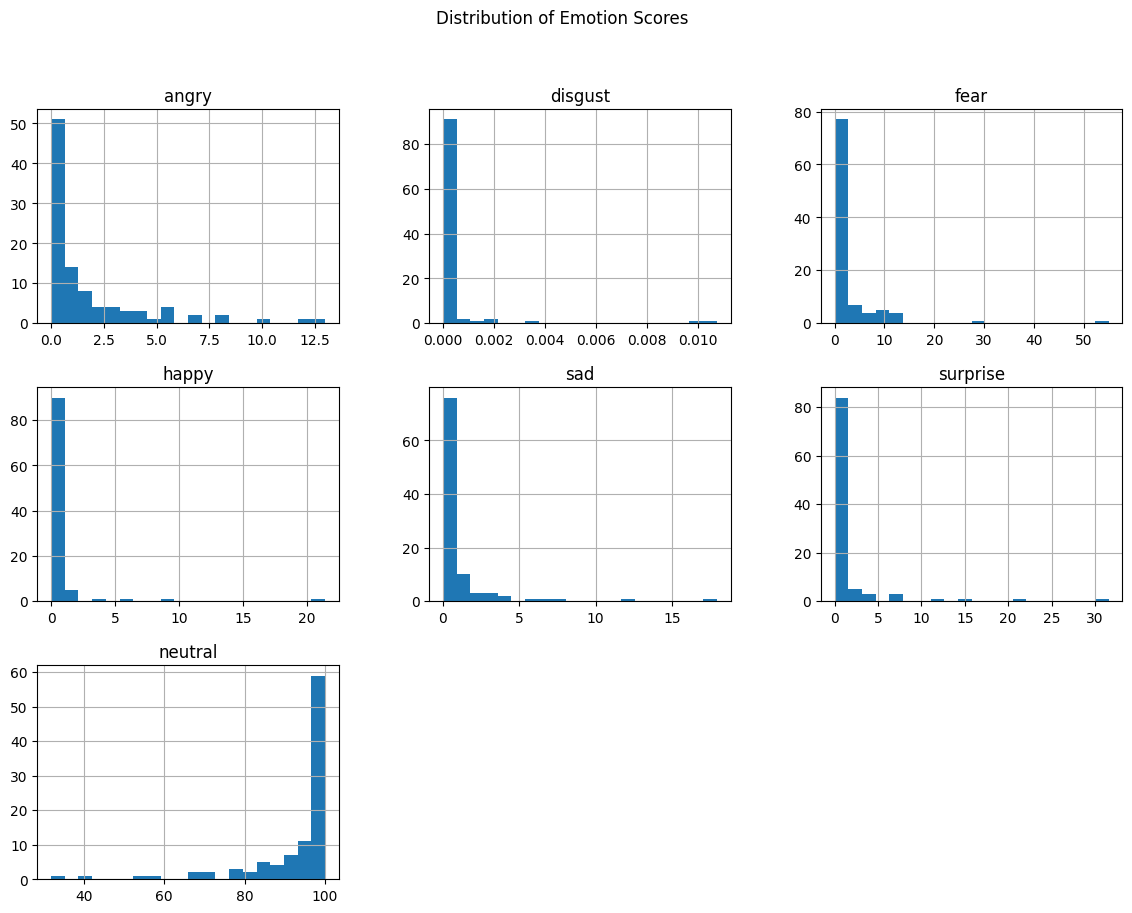


Dominant Emotion Counts:
dominant_emotion
neutral    98
fear        1
Name: count, dtype: int64


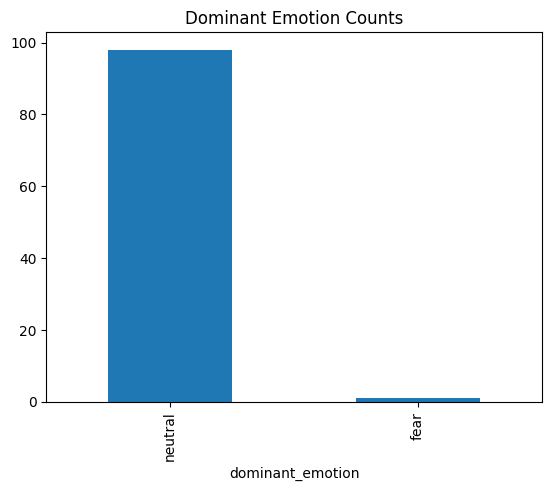


Correlation Matrix:
             angry   disgust      fear     happy       sad  surprise   neutral
angry     1.000000  0.471802  0.581159  0.063560  0.364138  0.486517 -0.780482
disgust   0.471802  1.000000  0.380642  0.047386  0.612656  0.036172 -0.450938
fear      0.581159  0.380642  1.000000  0.192141  0.278767  0.328232 -0.873142
happy     0.063560  0.047386  0.192141  1.000000  0.012081  0.046663 -0.329255
sad       0.364138  0.612656  0.278767  0.012081  1.000000 -0.067636 -0.407513
surprise  0.486517  0.036172  0.328232  0.046663 -0.067636  1.000000 -0.622424
neutral  -0.780482 -0.450938 -0.873142 -0.329255 -0.407513 -0.622424  1.000000


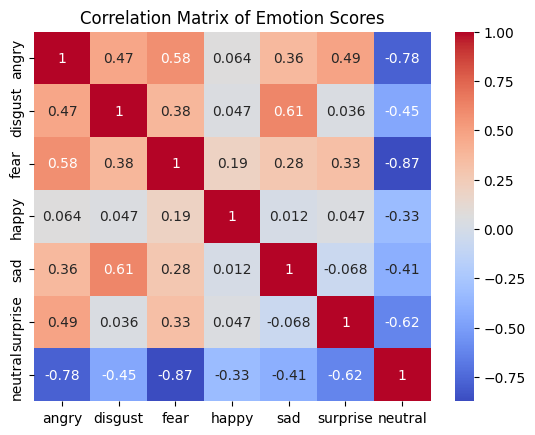

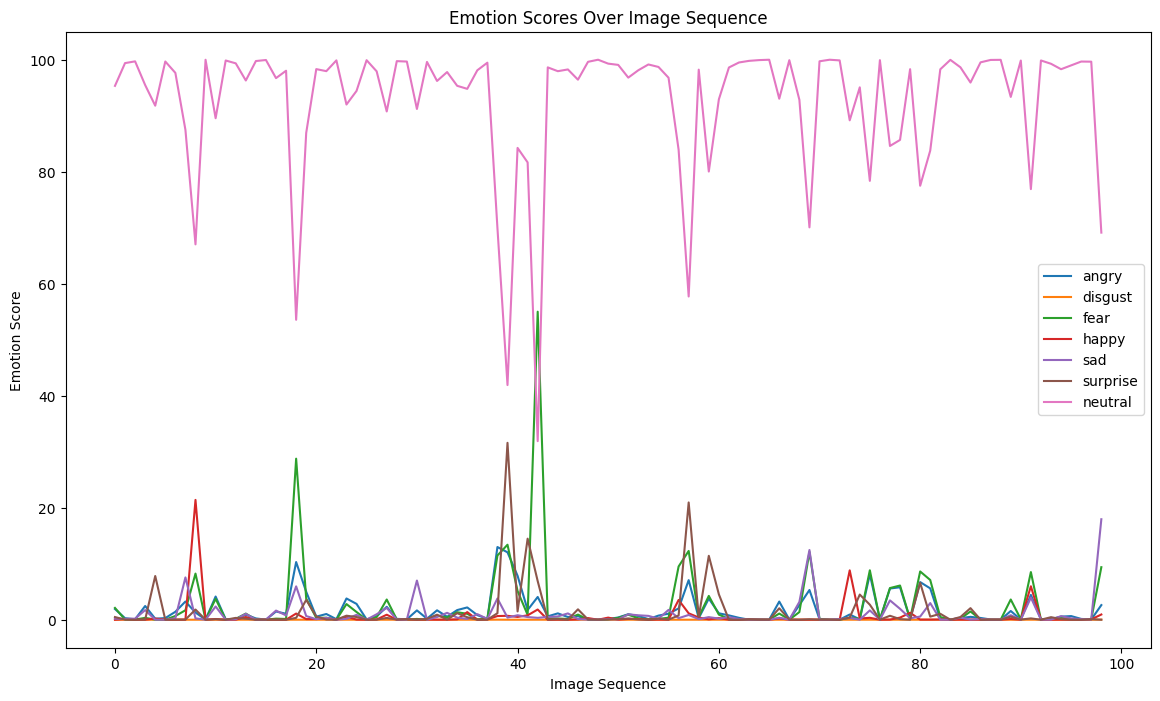

Error reading emotion_data-20240913T095942Z-001/emotion_data/4/emotion.csv: agg function failed [how->mean,dtype->object]
Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   movie_id          4 non-null      object 
 1   image_seq         4 non-null      int64  
 2   angry             4 non-null      float64
 3   disgust           4 non-null      float64
 4   fear              4 non-null      float64
 5   happy             4 non-null      float64
 6   sad               4 non-null      float64
 7   surprise          4 non-null      float64
 8   neutral           4 non-null      float64
 9   dominant_emotion  4 non-null      object 
dtypes: float64(7), int64(1), object(2)
memory usage: 448.0+ bytes
None

Statistical Summary:
       image_seq      angry       disgust      fear     happy       sad  \
count   4.000000   4.000000  4

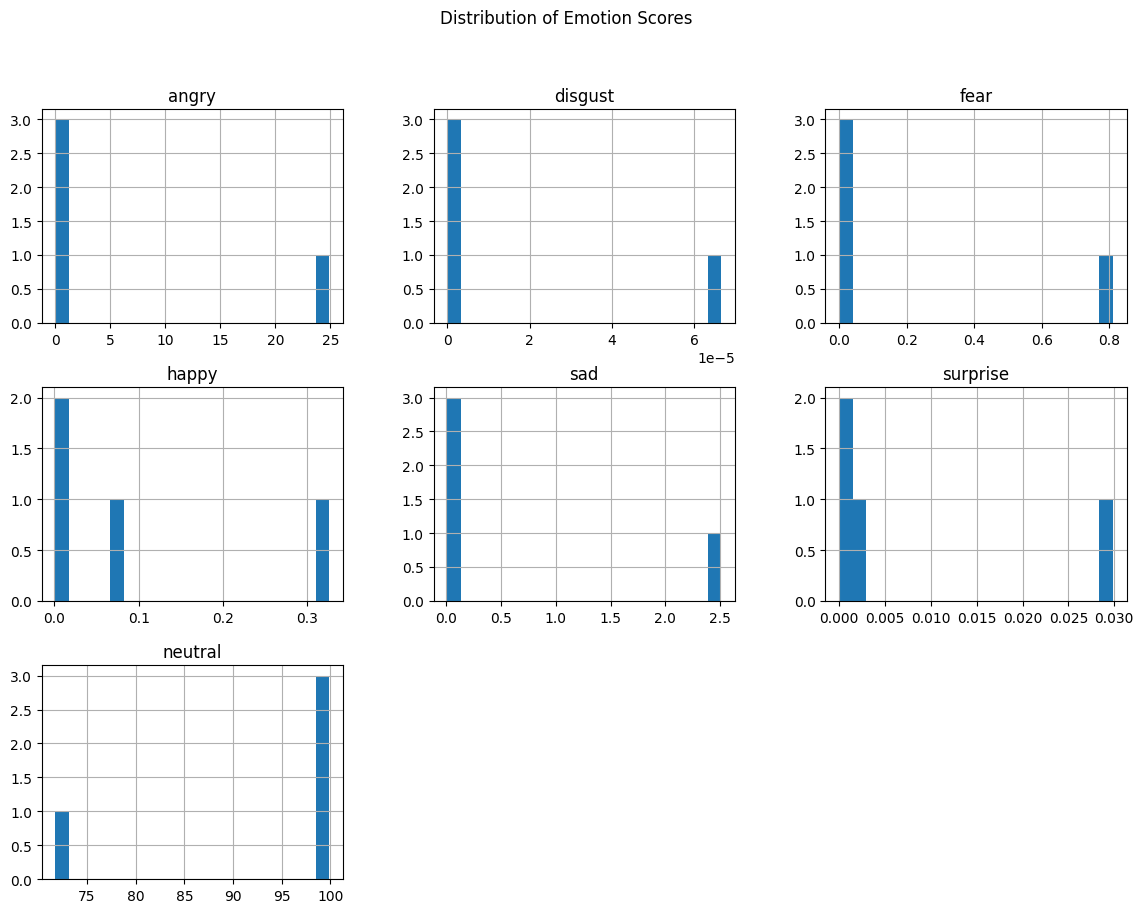


Dominant Emotion Counts:
dominant_emotion
neutral    4
Name: count, dtype: int64


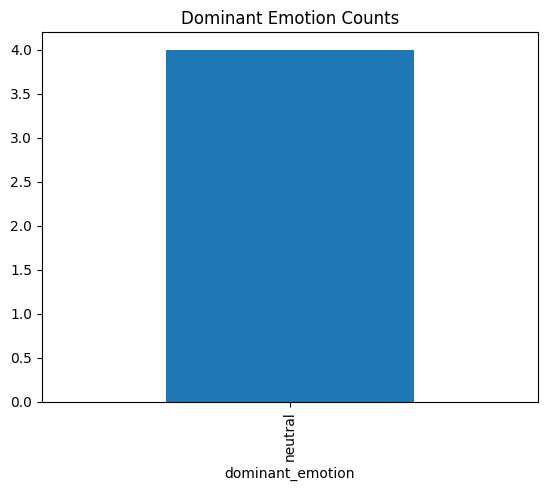


Correlation Matrix:
             angry   disgust      fear     happy       sad  surprise   neutral
angry     1.000000  0.999994  0.999996 -0.436291  0.999700  0.996992 -0.999928
disgust   0.999994  1.000000  1.000000 -0.434919  0.999714  0.997174 -0.999940
fear      0.999996  1.000000  1.000000 -0.435192  0.999710  0.997152 -0.999938
happy    -0.436291 -0.434919 -0.435192  1.000000 -0.414705 -0.455695  0.425493
sad       0.999700  0.999714  0.999710 -0.414705  1.000000  0.995728 -0.999915
surprise  0.996992  0.997174  0.997152 -0.455695  0.995728  1.000000 -0.996620
neutral  -0.999928 -0.999940 -0.999938  0.425493 -0.999915 -0.996620  1.000000


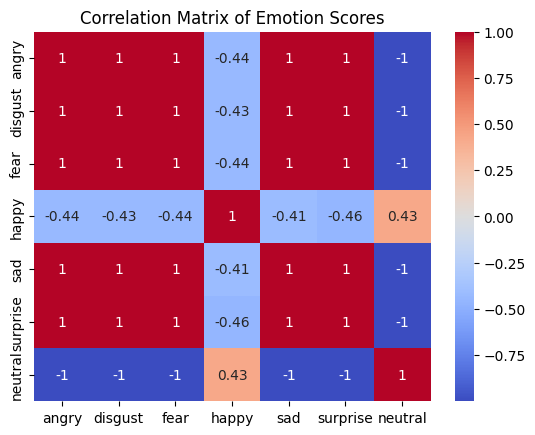

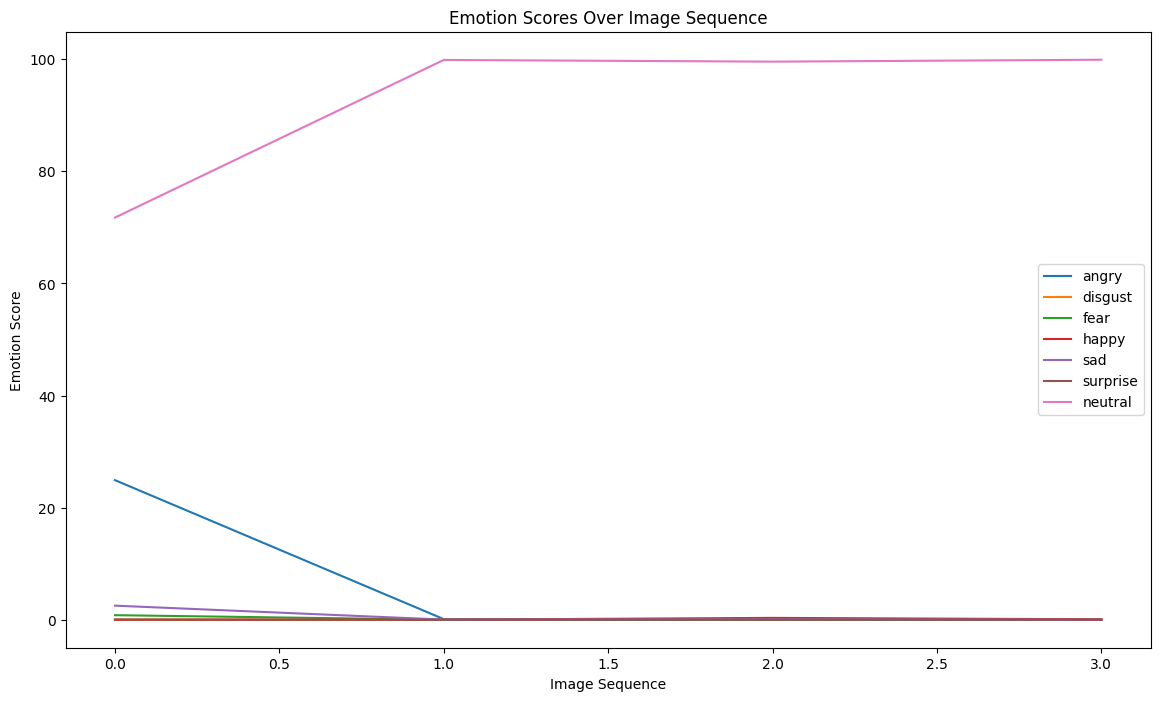

Error reading emotion_data-20240913T095942Z-001/emotion_data/5/emotion.csv: agg function failed [how->mean,dtype->object]
Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   movie_id          14 non-null     object 
 1   image_seq         14 non-null     int64  
 2   angry             14 non-null     float64
 3   disgust           14 non-null     float64
 4   fear              14 non-null     float64
 5   happy             14 non-null     float64
 6   sad               14 non-null     float64
 7   surprise          14 non-null     float64
 8   neutral           14 non-null     float64
 9   dominant_emotion  14 non-null     object 
dtypes: float64(7), int64(1), object(2)
memory usage: 1.2+ KB
None

Statistical Summary:
       image_seq      angry       disgust       fear      happy        sad  \
count    14.0000  14.000000  1

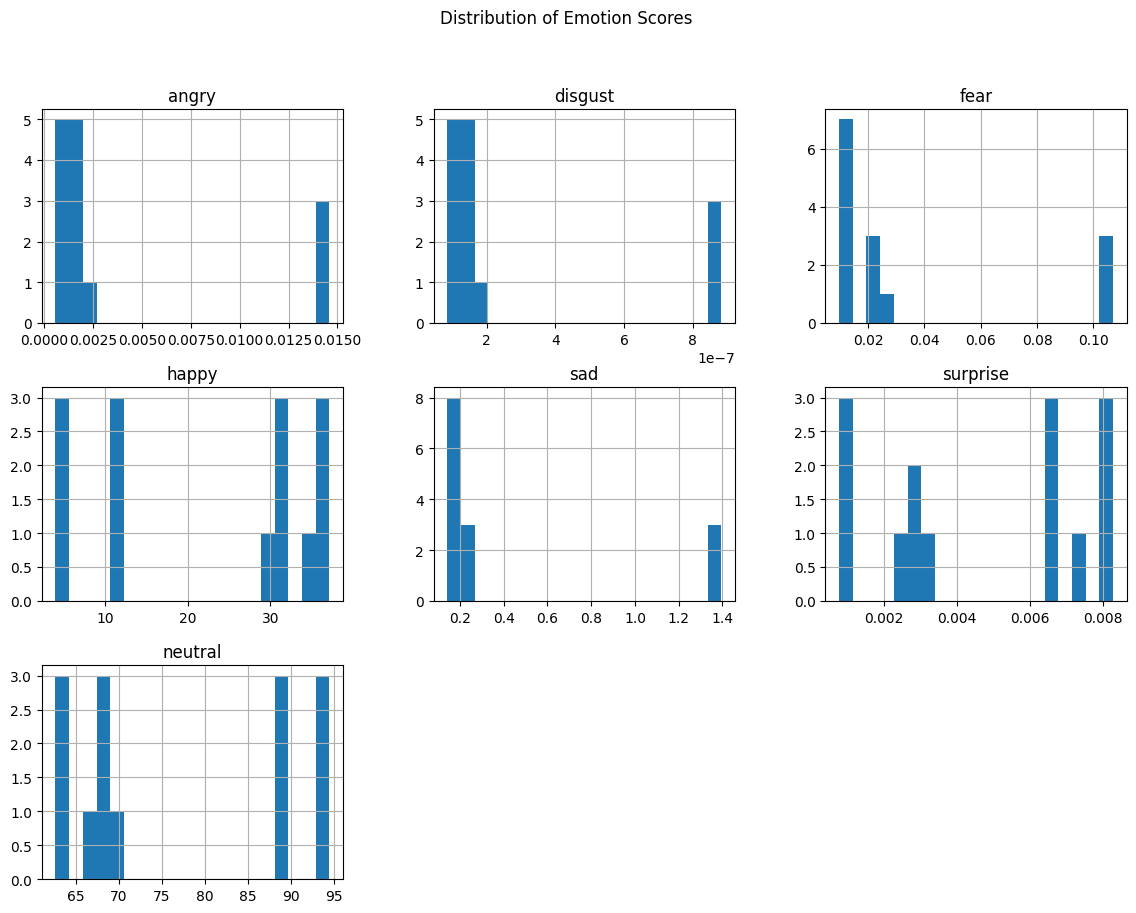


Dominant Emotion Counts:
dominant_emotion
neutral    14
Name: count, dtype: int64


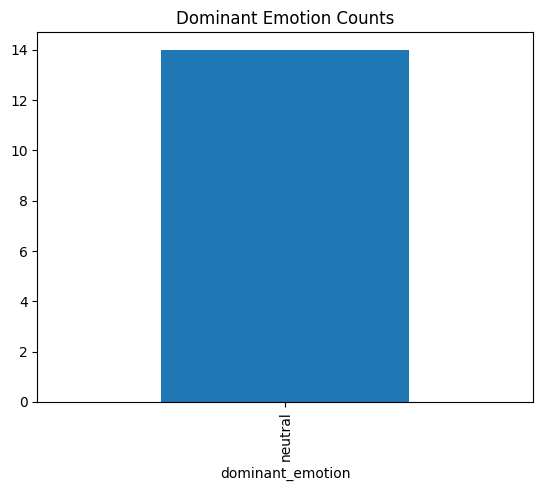


Correlation Matrix:
             angry   disgust      fear     happy       sad  surprise   neutral
angry     1.000000  0.998679  0.993508 -0.759172  0.999700 -0.728313  0.740836
disgust   0.998679  1.000000  0.994620 -0.752818  0.998585 -0.727871  0.734325
fear      0.993508  0.994620  1.000000 -0.800264  0.993300 -0.794885  0.783453
happy    -0.759172 -0.752818 -0.800264  1.000000 -0.748235  0.892689 -0.999615
sad       0.999700  0.998585  0.993300 -0.748235  1.000000 -0.727290  0.729548
surprise -0.728313 -0.727871 -0.794885  0.892689 -0.727290  1.000000 -0.889833
neutral   0.740836  0.734325  0.783453 -0.999615  0.729548 -0.889833  1.000000


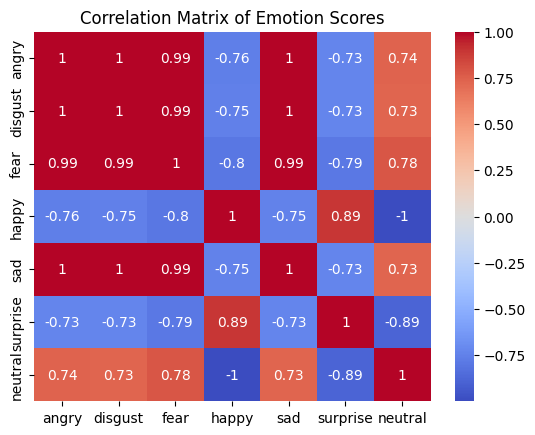

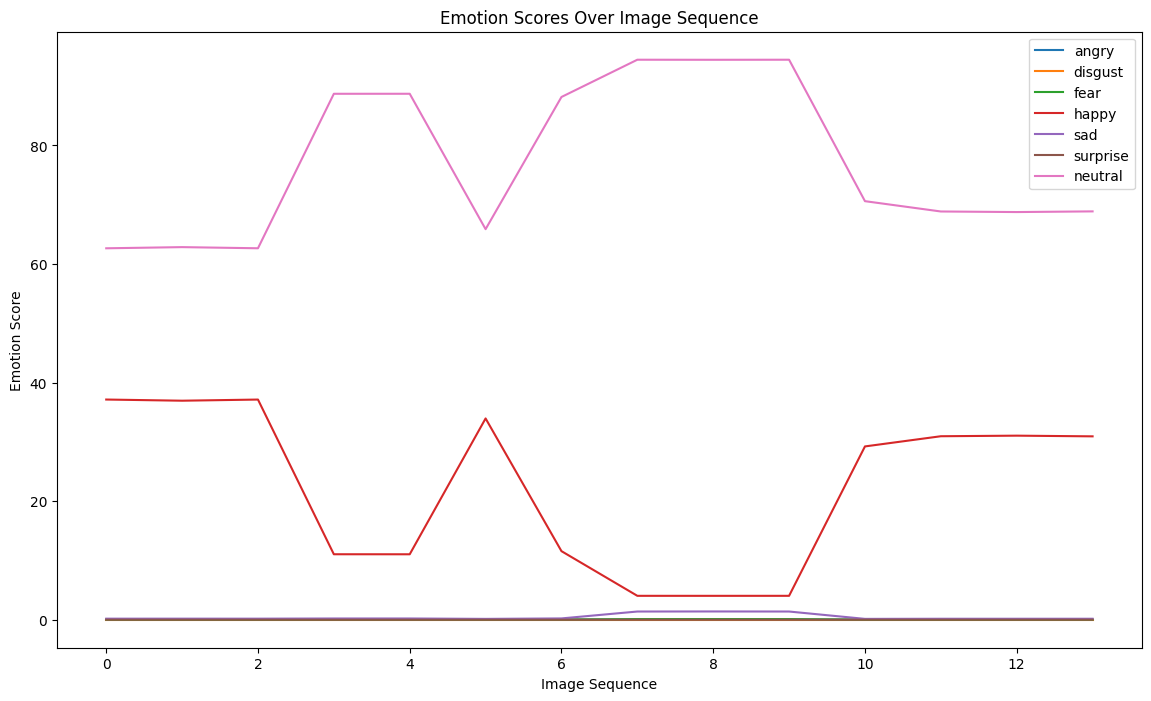

Error reading emotion_data-20240913T095942Z-001/emotion_data/6/emotion.csv: agg function failed [how->mean,dtype->object]
Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   movie_id          87 non-null     object 
 1   image_seq         87 non-null     int64  
 2   angry             87 non-null     float64
 3   disgust           87 non-null     float64
 4   fear              87 non-null     float64
 5   happy             87 non-null     float64
 6   sad               87 non-null     float64
 7   surprise          87 non-null     float64
 8   neutral           87 non-null     float64
 9   dominant_emotion  87 non-null     object 
dtypes: float64(7), int64(1), object(2)
memory usage: 6.9+ KB
None

Statistical Summary:
       image_seq      angry       disgust       fear      happy        sad  \
count  87.000000  87.000000  8

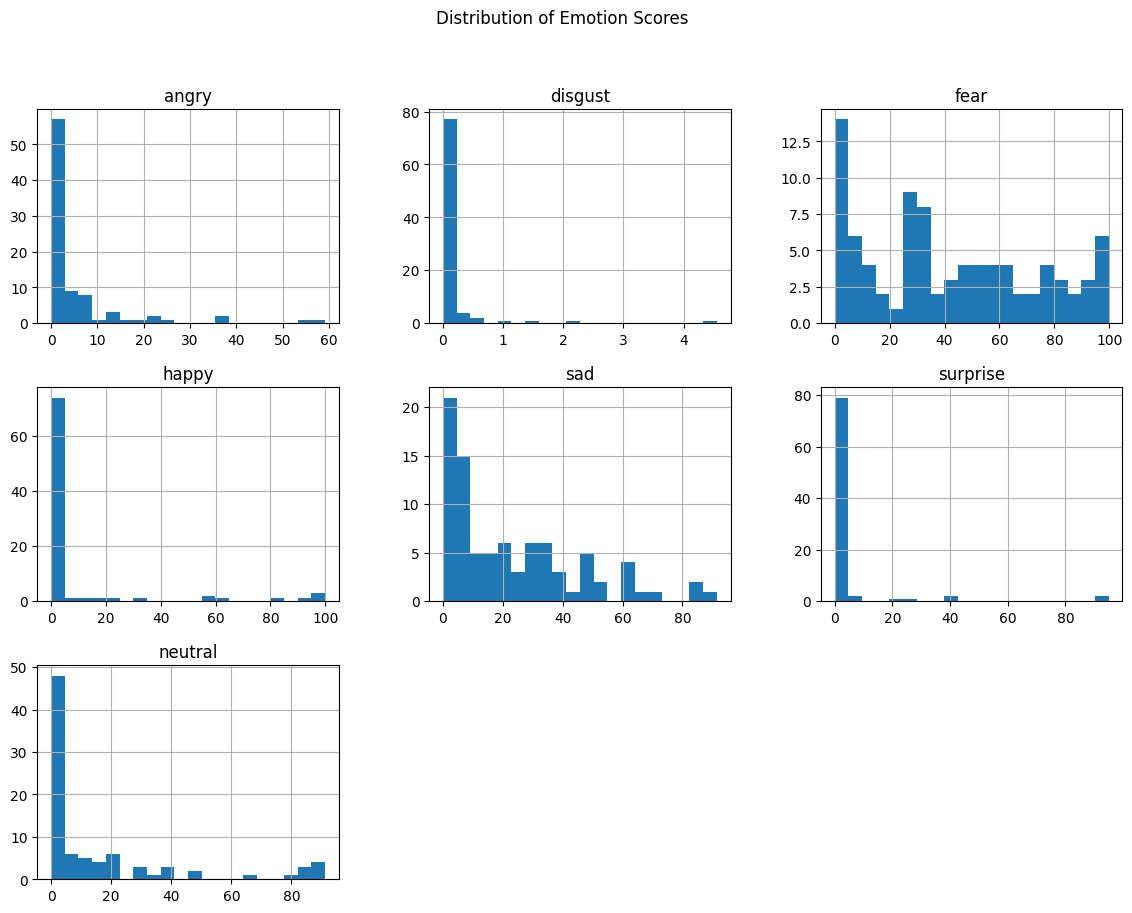


Dominant Emotion Counts:
dominant_emotion
fear        38
sad         22
neutral     13
happy        8
surprise     3
angry        3
Name: count, dtype: int64


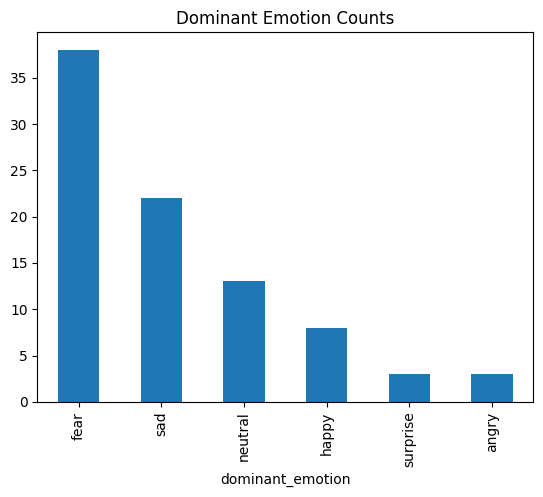


Correlation Matrix:
             angry   disgust      fear     happy       sad  surprise   neutral
angry     1.000000  0.675301 -0.156652 -0.168952  0.049635 -0.099827 -0.067903
disgust   0.675301  1.000000 -0.048774 -0.082832  0.005258 -0.060128 -0.135326
fear     -0.156652 -0.048774  1.000000 -0.325510 -0.277166 -0.129233 -0.519071
happy    -0.168952 -0.082832 -0.325510  1.000000 -0.313495 -0.074273 -0.146129
sad       0.049635  0.005258 -0.277166 -0.313495  1.000000 -0.220353 -0.139729
surprise -0.099827 -0.060128 -0.129233 -0.074273 -0.220353  1.000000 -0.137056
neutral  -0.067903 -0.135326 -0.519071 -0.146129 -0.139729 -0.137056  1.000000


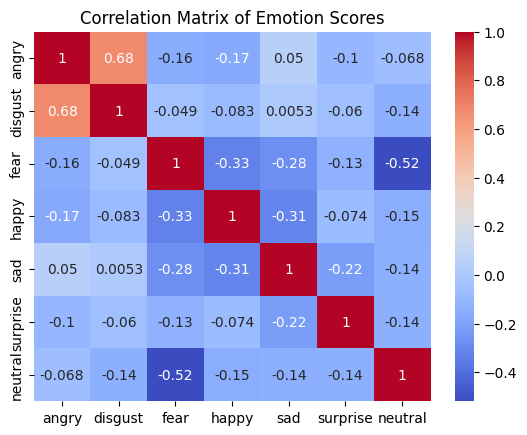

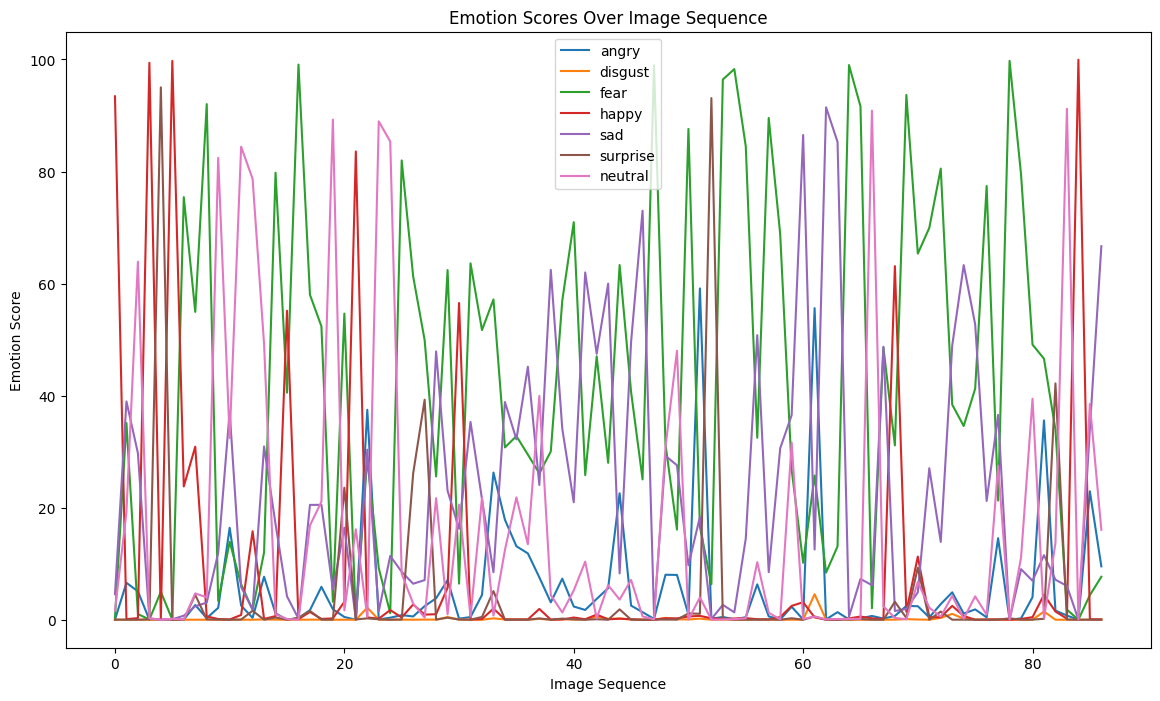

Error reading emotion_data-20240913T095942Z-001/emotion_data/7/emotion.csv: agg function failed [how->mean,dtype->object]
Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   movie_id          93 non-null     object 
 1   image_seq         93 non-null     int64  
 2   angry             93 non-null     float64
 3   disgust           93 non-null     float64
 4   fear              93 non-null     float64
 5   happy             93 non-null     float64
 6   sad               93 non-null     float64
 7   surprise          93 non-null     float64
 8   neutral           93 non-null     float64
 9   dominant_emotion  93 non-null     object 
dtypes: float64(7), int64(1), object(2)
memory usage: 7.4+ KB
None

Statistical Summary:
       image_seq      angry       disgust       fear      happy        sad  \
count  93.000000  93.000000  9

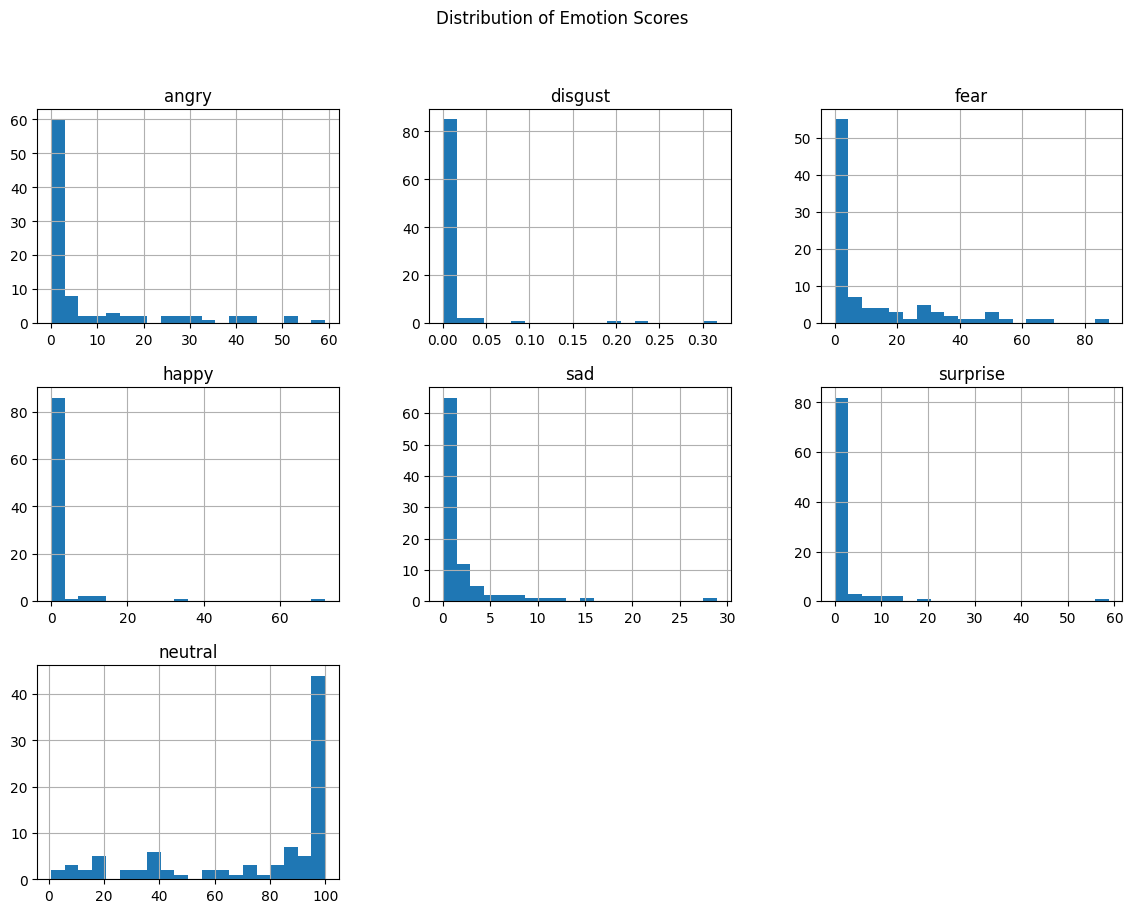


Dominant Emotion Counts:
dominant_emotion
neutral     73
fear        10
angry        7
happy        1
sad          1
surprise     1
Name: count, dtype: int64


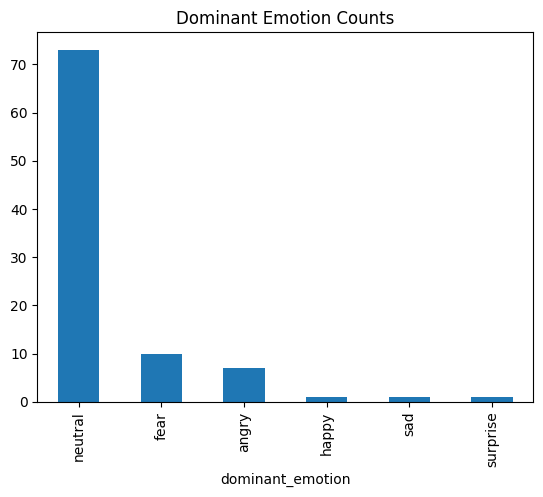


Correlation Matrix:
             angry   disgust      fear     happy       sad  surprise   neutral
angry     1.000000  0.386357  0.412618  0.009661  0.401213  0.087462 -0.740307
disgust   0.386357  1.000000  0.353140 -0.022667  0.442910  0.044537 -0.430195
fear      0.412618  0.353140  1.000000 -0.030470  0.130056  0.333435 -0.834222
happy     0.009661 -0.022667 -0.030470  1.000000  0.016946 -0.036717 -0.242736
sad       0.401213  0.442910  0.130056  0.016946  1.000000 -0.062584 -0.364011
surprise  0.087462  0.044537  0.333435 -0.036717 -0.062584  1.000000 -0.425295
neutral  -0.740307 -0.430195 -0.834222 -0.242736 -0.364011 -0.425295  1.000000


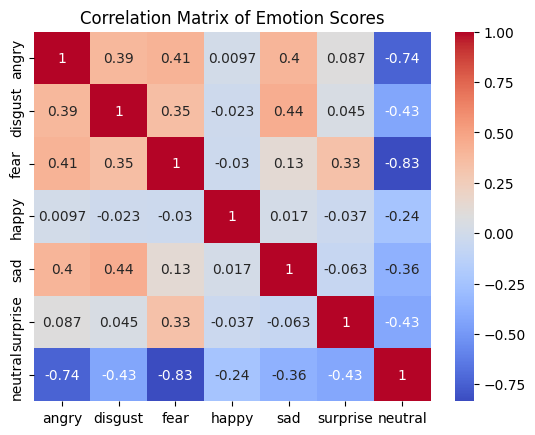

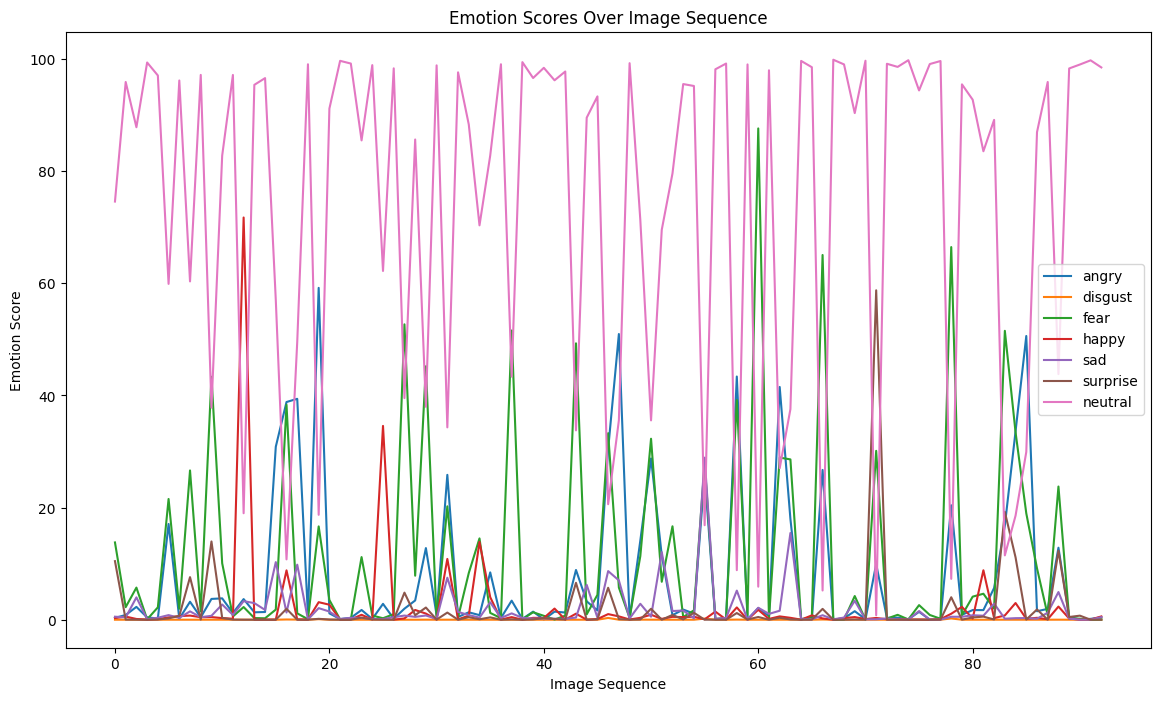

Error reading emotion_data-20240913T095942Z-001/emotion_data/8/emotion.csv: agg function failed [how->mean,dtype->object]
Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   movie_id          86 non-null     object 
 1   image_seq         86 non-null     int64  
 2   angry             86 non-null     float64
 3   disgust           86 non-null     float64
 4   fear              86 non-null     float64
 5   happy             86 non-null     float64
 6   sad               86 non-null     float64
 7   surprise          86 non-null     float64
 8   neutral           86 non-null     float64
 9   dominant_emotion  86 non-null     object 
dtypes: float64(7), int64(1), object(2)
memory usage: 6.8+ KB
None

Statistical Summary:
       image_seq      angry       disgust       fear      happy        sad  \
count  86.000000  86.000000  8

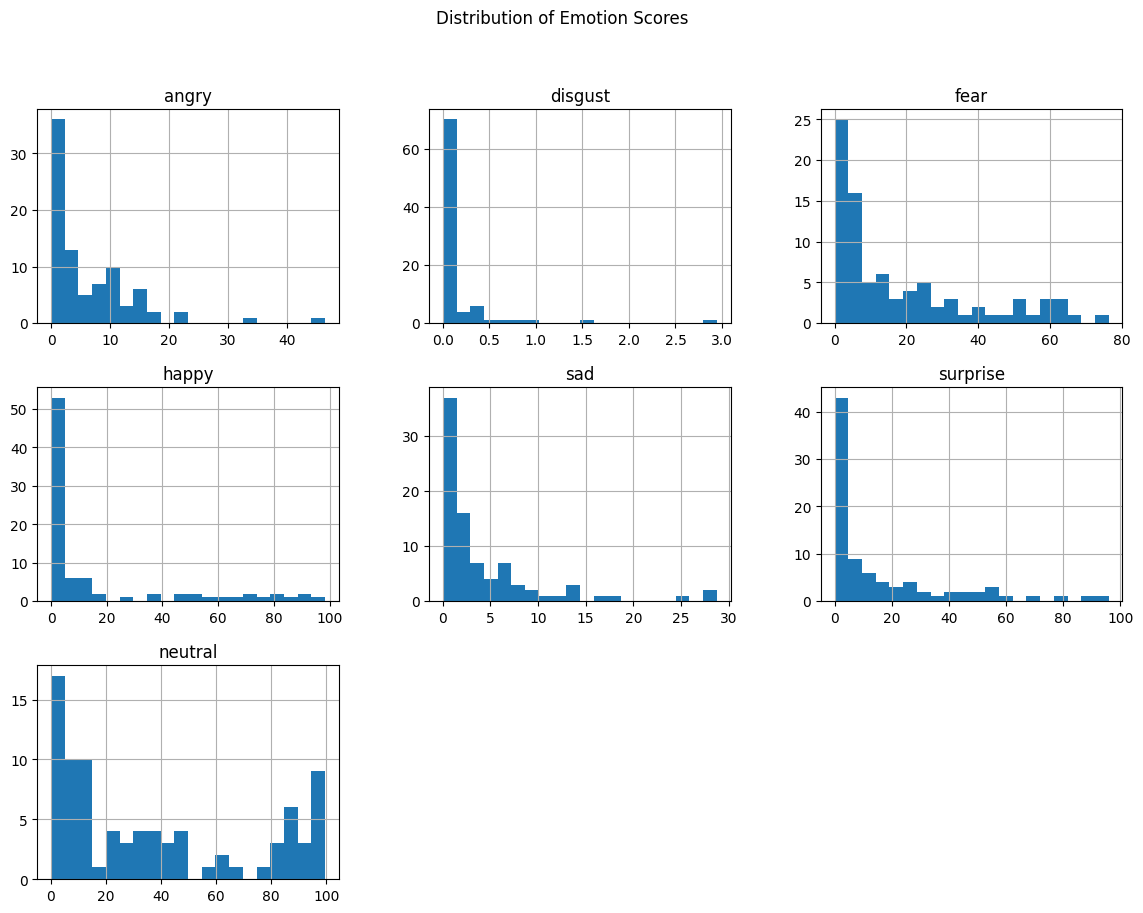


Dominant Emotion Counts:
dominant_emotion
neutral     37
happy       16
surprise    16
fear        16
angry        1
Name: count, dtype: int64


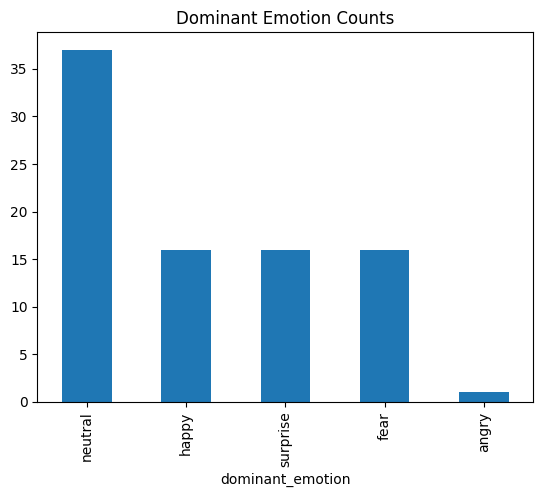


Correlation Matrix:
             angry   disgust      fear     happy       sad  surprise   neutral
angry     1.000000  0.214738  0.459845 -0.216665  0.291901 -0.083728 -0.317739
disgust   0.214738  1.000000  0.219472  0.149765  0.074241 -0.023049 -0.300970
fear      0.459845  0.219472  1.000000 -0.325162  0.102675  0.036246 -0.473755
happy    -0.216665  0.149765 -0.325162  1.000000 -0.154654 -0.110373 -0.447713
sad       0.291901  0.074241  0.102675 -0.154654  1.000000 -0.345374  0.044918
surprise -0.083728 -0.023049  0.036246 -0.110373 -0.345374  1.000000 -0.489689
neutral  -0.317739 -0.300970 -0.473755 -0.447713  0.044918 -0.489689  1.000000


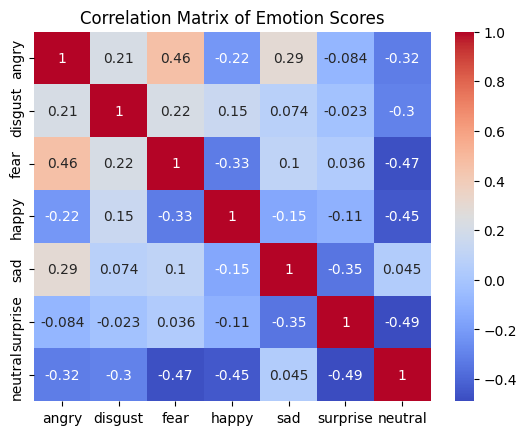

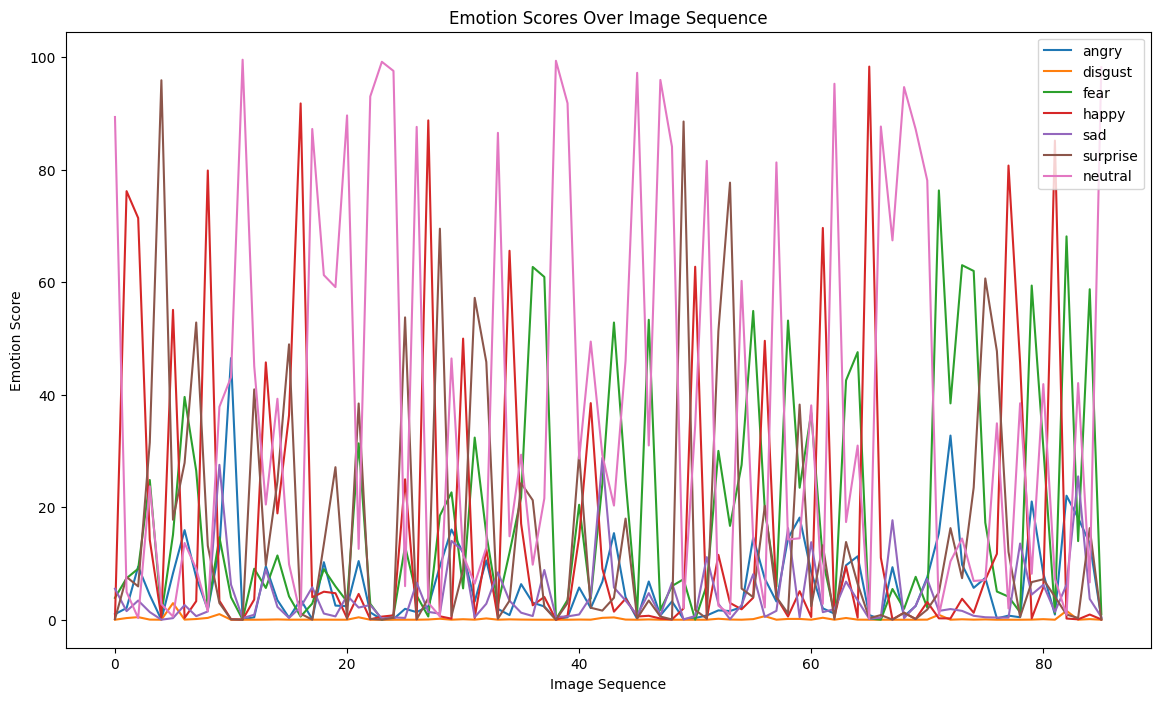

Error reading emotion_data-20240913T095942Z-001/emotion_data/9/emotion.csv: agg function failed [how->mean,dtype->object]
Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   movie_id          90 non-null     object 
 1   image_seq         90 non-null     int64  
 2   angry             90 non-null     float64
 3   disgust           90 non-null     float64
 4   fear              90 non-null     float64
 5   happy             90 non-null     float64
 6   sad               90 non-null     float64
 7   surprise          90 non-null     float64
 8   neutral           90 non-null     float64
 9   dominant_emotion  90 non-null     object 
dtypes: float64(7), int64(1), object(2)
memory usage: 7.2+ KB
None

Statistical Summary:
       image_seq      angry       disgust       fear         happy        sad  \
count  90.000000  90.000000

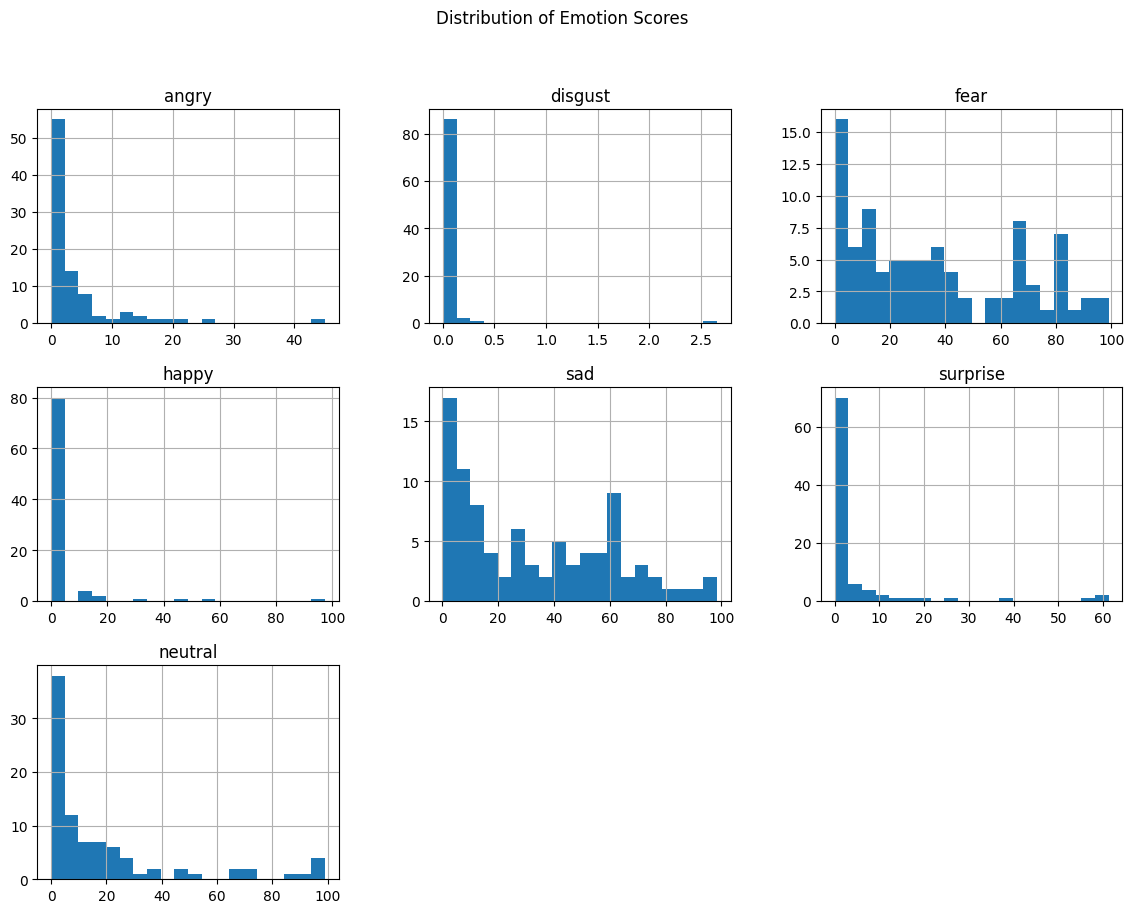


Dominant Emotion Counts:
dominant_emotion
sad         35
fear        35
neutral     13
happy        3
surprise     3
angry        1
Name: count, dtype: int64


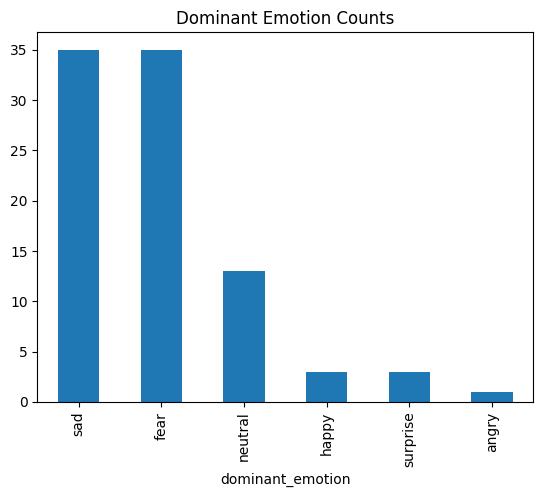


Correlation Matrix:
             angry   disgust      fear     happy       sad  surprise   neutral
angry     1.000000  0.321319 -0.029595 -0.045750 -0.027590 -0.090827 -0.136409
disgust   0.321319  1.000000  0.015100 -0.019006  0.001157 -0.038367 -0.085012
fear     -0.029595  0.015100  1.000000 -0.152918 -0.520811  0.183167 -0.575359
happy    -0.045750 -0.019006 -0.152918  1.000000 -0.202097 -0.049394 -0.086222
sad      -0.027590  0.001157 -0.520811 -0.202097  1.000000 -0.377150 -0.177750
surprise -0.090827 -0.038367  0.183167 -0.049394 -0.377150  1.000000 -0.210720
neutral  -0.136409 -0.085012 -0.575359 -0.086222 -0.177750 -0.210720  1.000000


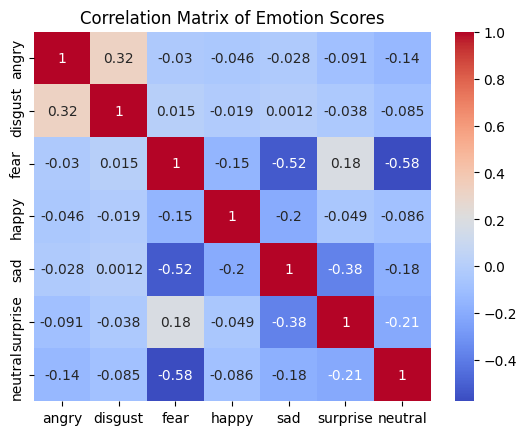

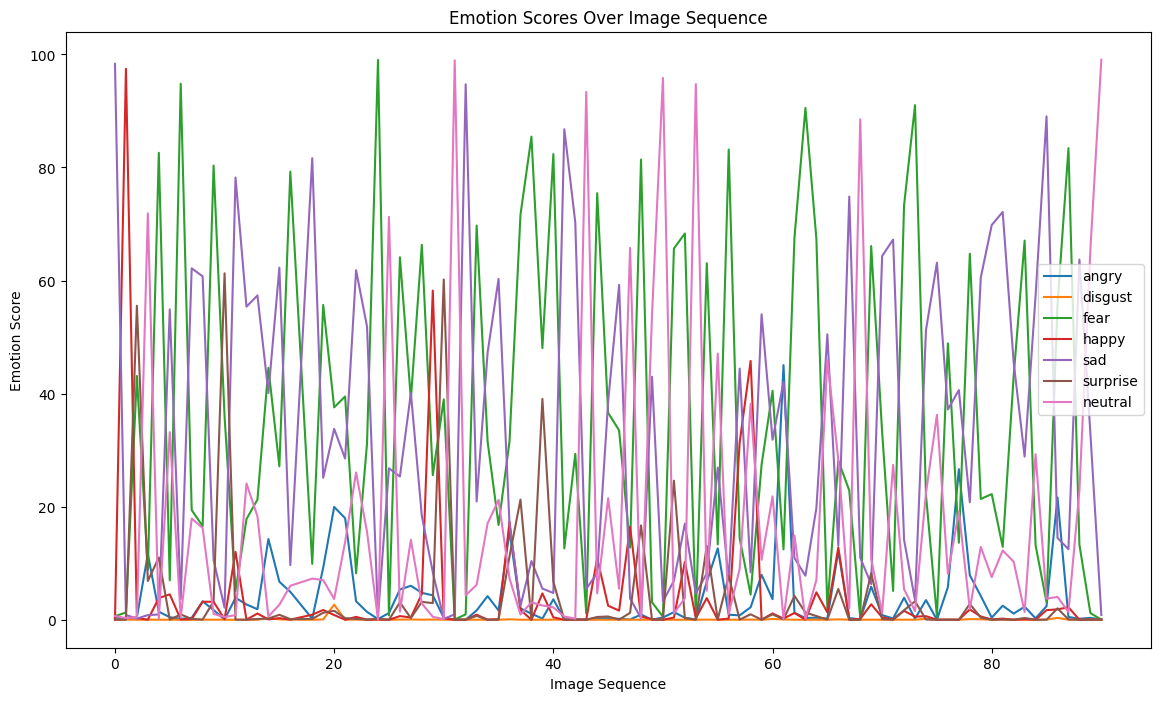

Error reading emotion_data-20240913T095942Z-001/emotion_data/10/emotion.csv: agg function failed [how->mean,dtype->object]


In [12]:
base_path = "emotion_data-20240913T095942Z-001/emotion_data/"

for i in range(1,11):
    file_path = os.path.join(base_path, str(i), "emotion.csv")
    
    if os.path.exists(file_path):
        try:
            emotion_df = pd.read_csv(file_path)
            emotion_eda(emotion_df)
            print(f"Data from {file_path}:")
            print(emotion_df.head())
        except Exception as e:
            print(f"Error reading {file_path}: {e}")
    else:
        print(f"File {file_path} does not exist.")


In [13]:
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def emotion_eda(df):
    st.header("Emotion Data Analysis (EDA)")

    # Basic Information
    st.subheader("Data Summary")
    buffer = st.empty()
    buffer.write(df.info())

    st.subheader("Statistical Summary")
    st.write(df.describe())

    # Check for Missing Values
    st.subheader("Missing Values")
    st.write(df.isnull().sum())

    # Check for Duplicates
    st.subheader("Duplicates")
    st.write(df.duplicated().sum())

    # Distribution of Emotion Scores
    st.subheader("Distribution of Emotion Scores")
    emotion_columns = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
    fig, ax = plt.subplots(figsize=(14, 10))
    df[emotion_columns].hist(bins=20, ax=ax)
    st.pyplot(fig)

    # Dominant Emotion Analysis
    st.subheader("Dominant Emotion Counts")
    dominant_emotion_counts = df['dominant_emotion'].value_counts()
    st.write(dominant_emotion_counts)
    fig, ax = plt.subplots()
    dominant_emotion_counts.plot(kind='bar', ax=ax, title='Dominant Emotion Counts')
    st.pyplot(fig)

    # Correlation Analysis
    st.subheader("Correlation Matrix of Emotion Scores")
    correlation_matrix = df[emotion_columns].corr()
    st.write(correlation_matrix)
    fig, ax = plt.subplots()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=ax)
    st.pyplot(fig)

    # Temporal or Sequential Analysis
    st.subheader("Emotion Scores Over Image Sequence")
    fig, ax = plt.subplots(figsize=(14, 8))
    for emotion in emotion_columns:
        ax.plot(df['image_seq'], df[emotion], label=emotion)
    ax.set_xlabel('Image Sequence')
    ax.set_ylabel('Emotion Score')
    ax.set_title('Emotion Scores Over Image Sequence')
    ax.legend()
    st.pyplot(fig)

    # Group Analysis by Dominant Emotion
    st.subheader("Average Emotion Scores by Dominant Emotion")
    grouped = df.groupby('dominant_emotion').mean()
    st.write(grouped)
    fig, ax = plt.subplots(figsize=(14, 8))
    grouped[emotion_columns].plot(kind='bar', ax=ax)
    ax.set_title('Average Emotion Scores by Dominant Emotion')
    st.pyplot(fig)

# To run this in Streamlit:
# Save your CSV as df and use:
# df = pd.read_csv('yourfile.csv')
# emotion_eda(df)


In [48]:
df_emotion['dominant_emotion'].value_counts()

dominant_emotion
neutral     37
fear        19
angry       11
sad         10
surprise     7
happy        3
Name: count, dtype: int64

In [16]:
df_gaze.head(2)

movie_id  image_seq  gaze  blink  eye_offset
0  93663f94-bf0a-4ce8-a29a-a5236cc7fe6a          1     1      0      6.2253
1  93663f94-bf0a-4ce8-a29a-a5236cc7fe6a          2     1      0     22.7274

In [40]:
folder_path = 'transcript_data'

average_dfs = []

for f in os.listdir(folder_path):
    id = int(f.split('.')[0])  
    file_path = os.path.join(folder_path, f)
    features = ['positive', 'negative', 'neutral', 'confident', 'hesitant', 'concise', 'enthusiastic', 'speech_speed']
    df = pd.read_csv(file_path, usecols=features)

    new_features = ['avg_positive', 'avg_negative', 'avg_neutral', 'avg_confident', 'avg_hesitant', 'avg_concise', 'avg_enthusiastic', 'avg_speech_speed']
    avg_values = df[features].mean().values
    
    new_df = pd.DataFrame([avg_values], columns=new_features, index=[id])
    
    average_dfs.append(new_df)

final_df = pd.concat(average_dfs)
final_df = final_df.sort_index()

final_df.head(10)


avg_positive  avg_negative  avg_neutral  avg_confident  avg_hesitant  \
1       0.709199      0.141214     0.149586       0.733828      0.485172   
2       0.722006      0.107541     0.170453       0.684879      0.436158   
3       0.567257      0.264337     0.168406       0.573566      0.604004   
4       0.655748      0.169142     0.175110       0.621740      0.570452   
5       0.630573      0.187013     0.182414       0.590094      0.461488   
6       0.711182      0.138992     0.149826       0.679755      0.490252   
7       0.717354      0.140232     0.142414       0.703714      0.457070   
8       0.605402      0.192292     0.202306       0.555011      0.507622   
9       0.617353      0.223949     0.158699       0.591842      0.538732   
10      0.589267      0.220948     0.189785       0.619852      0.520637   

    avg_concise  avg_enthusiastic  avg_speech_speed  
1      0.429418          0.466497          3.113771  
2      0.484221          0.516685          3.269092  
3      0.394715          0.448050          3.385636  
4      0.403479          0.440626          2.775454  
5      0.413644          0.378110          2.817341  
6      0.367792          0.481433          2.583163  
7      0.398571          0.463940          2.284897  
8      0.352011          0.437399          2.902953  
9      0.381809          0.505152          3.329938  
10     0.385655          0.325507          3.248518

In [41]:
final_df.to_csv('final_df.csv', index=True)

In [68]:
folder_path = 'emotion_data'

dominant_emotions = {'student_top1': [], 'student_top2': []}

for i in range(1, 11):
    file_name = f'{i}/emotion.csv'
    file_path = os.path.join(folder_path, file_name)
    
    df = pd.read_csv(file_path)

    top_emotions = df['dominant_emotion'].value_counts().nlargest(2).index.tolist()
    
    dominant_emotions['student_top1'].append(top_emotions[0] if len(top_emotions) > 0 else "neutral")
    dominant_emotions['student_top2'].append(top_emotions[1] if len(top_emotions) > 1 else "neutral")

df_dominantEmotion_for_everystudent = pd.DataFrame(dominant_emotions)

df_dominantEmotion_for_everystudent.columns = [
    f'dominant_emotion_top1' if 'top1' in col else f'dominant_emotion_top2'
    for i, col in enumerate(df_dominantEmotion_for_everystudent.columns, start=1)
]

df_dominantEmotion_for_everystudent.index = range(1, 11)
df_dominantEmotion_for_everystudent.head(10)


dominant_emotion_top1 dominant_emotion_top2
1                neutral                  fear
2                  happy               neutral
3                neutral                  fear
4                neutral                  fear
5                neutral               neutral
6                neutral               neutral
7                   fear                   sad
8                neutral                  fear
9                neutral                 happy
10                   sad                  fear

In [69]:
final_df_with_emotions = pd.concat([final_df, df_dominantEmotion_for_everystudent], axis=1)

# Print the final merged DataFrame
final_df_with_emotions.head(10)


avg_positive  avg_negative  avg_neutral  avg_confident  avg_hesitant  \
1       0.709199      0.141214     0.149586       0.733828      0.485172   
2       0.722006      0.107541     0.170453       0.684879      0.436158   
3       0.567257      0.264337     0.168406       0.573566      0.604004   
4       0.655748      0.169142     0.175110       0.621740      0.570452   
5       0.630573      0.187013     0.182414       0.590094      0.461488   
6       0.711182      0.138992     0.149826       0.679755      0.490252   
7       0.717354      0.140232     0.142414       0.703714      0.457070   
8       0.605402      0.192292     0.202306       0.555011      0.507622   
9       0.617353      0.223949     0.158699       0.591842      0.538732   
10      0.589267      0.220948     0.189785       0.619852      0.520637   

    avg_concise  avg_enthusiastic  avg_speech_speed dominant_emotion_top1  \
1      0.429418          0.466497          3.113771               neutral   
2      0.484221          0.516685          3.269092                 happy   
3      0.394715          0.448050          3.385636               neutral   
4      0.403479          0.440626          2.775454               neutral   
5      0.413644          0.378110          2.817341               neutral   
6      0.367792          0.481433          2.583163               neutral   
7      0.398571          0.463940          2.284897                  fear   
8      0.352011          0.437399          2.902953               neutral   
9      0.381809          0.505152          3.329938               neutral   
10     0.385655          0.325507          3.248518                   sad   

   dominant_emotion_top2  
1                   fear  
2                neutral  
3                   fear  
4                   fear  
5                neutral  
6                neutral  
7                    sad  
8                   fear  
9                  happy  
10                  fear

In [70]:
final_df_with_emotions.to_csv('final_df.csv', index=True)